In [1]:
import mlx.core as mx
import mlx.nn as nn
from mlx.data import datasets
import mlx.optimizers as optim

In [2]:
cifar100_train = datasets.load_cifar100(train=True)
cifar100_test = datasets.load_cifar100(train=False)

In [3]:
def get_streamed_data(data, batch_size=0, shuffled=True):
    buffer = data.shuffle() if shuffled else data
    stream = buffer.to_stream()
    stream = stream.key_transform("image", lambda x: x.astype("float32"))
    stream = stream.batch(batch_size) if batch_size > 0 else stream
    return stream.prefetch(4, 2)

In [10]:
mx.random.seed(42)
stream = get_streamed_data(cifar100_train, batch_size=1, shuffled=True)
batch = next(stream)
X, y = mx.array(batch["image"]), mx.array(batch["label"])
X.shape, y.shape

((1, 32, 32, 3), (1,))

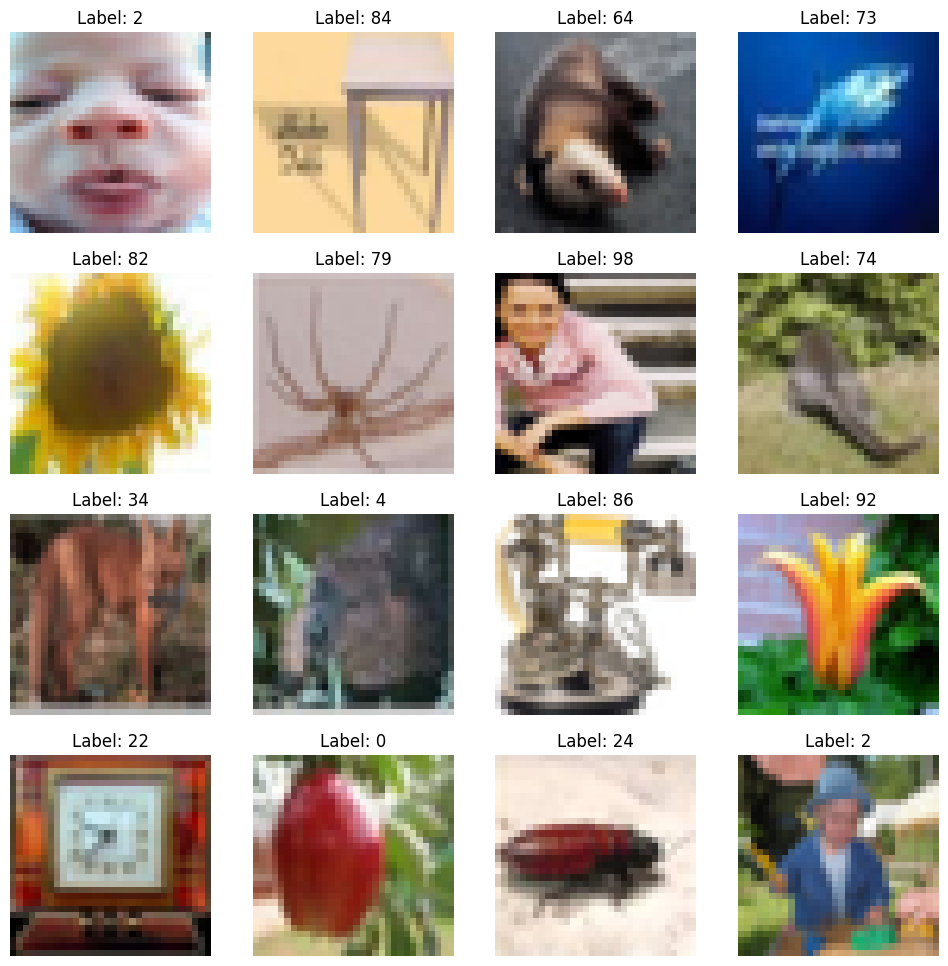

In [16]:
import matplotlib.pyplot as plt
# Visualize image samples
mx.random.seed(42)

n_cols = 4
n_rows = 4
fig = plt.figure(figsize=(12, 12))
for i, batch in zip(range(n_cols * n_rows), stream):    
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    img = mx.array(batch["image"])
    label = mx.array(batch["label"])
    img = mx.clip(img, 0, 255).astype(mx.uint8)
    ax.set_title(f"Label: {label.squeeze().item()}")
    ax.set_axis_off()
    ax.imshow(img.squeeze())
plt.show()